In [ ]:
from autogen_agentchat.agents import AssistantAgent
from autogen_agentchat.messages import TextMessage
from autogen_agentchat.ui import Console
from autogen_core import CancellationToken
from autogen_ext.models.ollama import OllamaChatCompletionClient

# Define a tool that searches the web for information.
async def web_search(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# Create an agent that uses the OpenAI GPT-4o model.
model_client = OllamaChatCompletionClient(
    model="qwen2.5:7b",
)
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
    reflect_on_tool_use=True,
)

async def assistant_run() -> None:
    response = await agent.on_messages(
        [TextMessage(content="Find information on AutoGen", source="user")],
        cancellation_token=CancellationToken(),
    )
    print(response.inner_messages)
    print(response.chat_message)


# Use asyncio.run(assistant_run()) when running in a script.
await assistant_run()

[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=148, completion_tokens=21), metadata={}, content=[FunctionCall(id='0', arguments='{"query": "AutoGen"}', name='web_search')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='0', is_error=False)], type='ToolCallExecutionEvent')]
source='assistant' models_usage=RequestUsage(prompt_tokens=73, completion_tokens=62) metadata={} content='AutoGen is a programming framework designed for the development of multi-agent applications. This tool or library helps in creating systems where multiple autonomous entities can interact with each other and their environment. If you need more detailed information, such as specific use cases, supported languages, or documentation links, please let me know!' type='TextMessage'



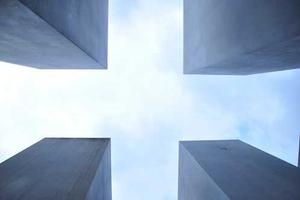

In [7]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img

In [8]:
# Use asyncio.run(...) when running in a script.
response = await agent.on_messages([multi_modal_message], CancellationToken())
print(response.chat_message.content)

I'm unable to directly analyze images or access local files. However, if you could provide a description of the image or any specific details you're interested in knowing about it, I'd be happy to assist further! Alternatively, if you need text-based information related to AutoGen based on the image, please share more context.


In [13]:
async def assistant_run_stream() -> None:
    # Option 1: read each message from the stream (as shown in the previous example).
    # async for message in agent.on_messages_stream(
    #     [TextMessage(content="Find information on AutoGen", source="user")],
    #     cancellation_token=CancellationToken(),
    # ):
    #     print(message)

    # Option 2: use Console to print all messages as they appear.
    await Console(
        agent.on_messages_stream(
            [TextMessage(content="Find information on AutoGen", source="user")],
            cancellation_token=CancellationToken(),
        ),
        output_stats=True,  # Enable stats printing.
    )


# Use asyncio.run(assistant_run_stream()) when running in a script.
await assistant_run_stream()

---------- assistant ----------
[FunctionCall(id='1', arguments='{"query": "AutoGen programming framework"}', name='web_search')]
[Prompt tokens: 273, Completion tokens: 23]
---------- assistant ----------
[FunctionExecutionResult(content='AutoGen is a programming framework for building multi-agent applications.', name='web_search', call_id='1', is_error=False)]
---------- assistant ----------
AutoGen is a programming framework designed for the development of multi-agent systems. It allows you to create and manage multiple autonomous agents that can interact with each other and their environment.

If you need more detailed information, such as specific use cases, supported languages, or documentation links, please let me know!
[Prompt tokens: 200, Completion tokens: 61]
---------- Summary ----------
Number of inner messages: 2
Total prompt tokens: 473
Total completion tokens: 84
Duration: 6.12 seconds


In [14]:
from autogen_core.tools import FunctionTool


# Define a tool using a Python function.
async def web_search_func(query: str) -> str:
    """Find information on the web"""
    return "AutoGen is a programming framework for building multi-agent applications."


# This step is automatically performed inside the AssistantAgent if the tool is a Python function.
web_search_function_tool = FunctionTool(web_search_func, description="Find information on the web")
# The schema is provided to the model during AssistantAgent's on_messages call.
web_search_function_tool.schema

{'name': 'web_search_func',
 'description': 'Find information on the web',
 'parameters': {'type': 'object',
  'properties': {'query': {'description': 'query',
    'title': 'Query',
    'type': 'string'}},
  'required': ['query'],
  'additionalProperties': False},
 'strict': False}

In [23]:
from autogen_agentchat.agents import AssistantAgent
# from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_ext.models.ollama import OllamaChatCompletionClient
from autogen_ext.tools.mcp import StdioServerParams, mcp_server_tools

# Get the fetch tool from mcp-server-fetch.
fetch_mcp_server = StdioServerParams(command="uvx", args=["mcp-server-fetch"])
tools = await mcp_server_tools(fetch_mcp_server)

# Create an agent that can use the fetch tool.
# model_client = OpenAIChatCompletionClient(model="gpt-4o")
model_client = OllamaChatCompletionClient(model="qwen2.5:7b")
agent = AssistantAgent(name="fetcher", model_client=model_client, tools=tools, reflect_on_tool_use=True)  # type: ignore

# Let the agent fetch the content of a URL and summarize it.
# result = await agent.run(task="Summarize the content of https://en.wikipedia.org/wiki/Seattle")
# result = await agent.run(task="Summarize the content of https://microsoft.github.io/autogen/stable/user-guide/agentchat-user-guide/tutorial/agents.html")
result = await agent.run(task="Summarize the content of https://docs.godotengine.org/en/stable/about/introduction.html")
print(result.messages[-1].content)

/Users/kevinlights/app/miniforge3/envs/open_manus/lib/python3.12/site-packages/autogen_agentchat/agents/_assistant_agent.py:870: UserWarning: Finish reason mismatch: stop != tool_calls when tool_calls are present. Finish reason may not be accurate. This may be due to the API used that is not returning the correct finish reason.
  model_result = await model_client.create(


The official documentation of Godot Engine, a free and open-source game development tool for creating both 2D and 3D games, is structured to cater to beginners as well as advanced users. Key sections include:

1. **Introduction**: Provides an overview with code examples.
2. **Before You Start**: Lists community resources like video tutorials, the Getting Started guide, and where to seek help if needed.
3. **About Godot Engine**: Offers a brief synopsis on what Godot is, emphasizing its cross-platform capabilities and open-source nature.
4. **Organization of Documentation**:
   - **About**: Details about the engine’s history, licensing, and community.
   - **Getting Started**: Comprehensive guide for new users.
   - **Manual**: Tutorials and documentation for specific features.
   - **Contributing**: Information on contributing to Godot Engine, including reporting bugs and compiling the engine.
   - **Community**: Recommendations for external tutorials, details about the Asset Library, 

In [26]:
import pandas as pd
from autogen_ext.tools.langchain import LangChainToolAdapter
from langchain_experimental.tools.python.tool import PythonAstREPLTool

# df = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")
df = pd.read_csv("data/titanic.csv")
tool = LangChainToolAdapter(PythonAstREPLTool(locals={"df": df}))
# model_client = OpenAIChatCompletionClient(model="gpt-4o")
agent = AssistantAgent(
    "assistant", tools=[tool], model_client=model_client, system_message="Use the `df` variable to access the dataset."
)
await Console(
    agent.on_messages_stream(
        [TextMessage(content="What's the average Age of the passengers?", source="user")], CancellationToken()
    ),
    output_stats=True,
)

---------- assistant ----------
[FunctionCall(id='3', arguments='{"query": "df[\'Age\'].mean()"}', name='python_repl_ast')]
[Prompt tokens: 199, Completion tokens: 27]
---------- assistant ----------
[FunctionExecutionResult(content='29.69911764705882', name='python_repl_ast', call_id='3', is_error=False)]
---------- assistant ----------
29.69911764705882
---------- Summary ----------
Number of inner messages: 2
Total prompt tokens: 199
Total completion tokens: 27
Duration: 1.53 seconds


/Users/kevinlights/app/miniforge3/envs/open_manus/lib/python3.12/site-packages/autogen_agentchat/agents/_assistant_agent.py:870: UserWarning: Finish reason mismatch: stop != tool_calls when tool_calls are present. Finish reason may not be accurate. This may be due to the API used that is not returning the correct finish reason.
  model_result = await model_client.create(


Response(chat_message=ToolCallSummaryMessage(source='assistant', models_usage=None, metadata={}, content='29.69911764705882', type='ToolCallSummaryMessage'), inner_messages=[ToolCallRequestEvent(source='assistant', models_usage=RequestUsage(prompt_tokens=199, completion_tokens=27), metadata={}, content=[FunctionCall(id='3', arguments='{"query": "df[\'Age\'].mean()"}', name='python_repl_ast')], type='ToolCallRequestEvent'), ToolCallExecutionEvent(source='assistant', models_usage=None, metadata={}, content=[FunctionExecutionResult(content='29.69911764705882', name='python_repl_ast', call_id='3', is_error=False)], type='ToolCallExecutionEvent')])

In [61]:
from typing import Literal

from pydantic import BaseModel


# The response format for the agent as a Pydantic base model.
class AgentResponse(BaseModel):
    thoughts: str
    response: Literal["happy", "sad", "neutral"]


# Create an agent that uses the OpenAI GPT-4o model with the custom response format.

model_client = OllamaChatCompletionClient(
    model="llama3:8b",
    response_format=AgentResponse,
)
agent = AssistantAgent(
    "assistant",
    model_client=model_client,
    # system_message="Categorize the input as happy, sad, or neutral following the JSON format",
    system_message="Categorize the input as happy, sad, or neutral following the JSON format with thoughts and response fields",
    # reflect_on_tool_use=True,
)

await Console(agent.run_stream(task="I am happy."))
# await Console(agent.run_stream(task="I am not so happy."))

---------- user ----------
I am happy.
---------- assistant ----------
Here is the categorized input in JSON format:

{
"thoughts": ["I am happy"],
"response": "happy"
}


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='I am happy.', type='TextMessage'), TextMessage(source='assistant', models_usage=RequestUsage(prompt_tokens=40, completion_tokens=27), metadata={}, content='Here is the categorized input in JSON format:\n\n{\n"thoughts": ["I am happy"],\n"response": "happy"\n}', type='TextMessage')], stop_reason=None)

In [69]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_core.models import ModelFamily

model_client = OpenAIChatCompletionClient(
    # model="deepseek-r1:1.5b",
    model="llama3:8b",
    base_url="http://localhost:11434/v1",
    api_key="placeholder",
    model_info={
        "vision": False,
        "function_calling": False,
        "json_output": False,
        "family": ModelFamily.R1,
    },
    response_format=AgentResponse,
)
agent = AssistantAgent(
    "assistant",
    model_client=model_client,
    system_message="Categorize the input as happy, sad, or neutral following the JSON format",
)

await Console(agent.run_stream(task="I am not so happy."))

---------- user ----------
I am not so happy.
---------- assistant ----------
{"thoughts": "sad", "response": "sad" }


TaskResult(messages=[TextMessage(source='user', models_usage=None, metadata={}, content='I am not so happy.', type='TextMessage'), TextMessage(source='assistant', models_usage=RequestUsage(prompt_tokens=37, completion_tokens=17), metadata={}, content='{"thoughts": "sad", "response": "sad" }', type='TextMessage')], stop_reason=None)

In [74]:
# model_client = OpenAIChatCompletionClient(model="gpt-4o")

model_client = OpenAIChatCompletionClient(
    # model="deepseek-r1:1.5b",
    model="llama3:8b",
    base_url="http://localhost:11434/v1",
    api_key="placeholder",
    model_info={
        "vision": False,
        "function_calling": True,
        "json_output": False,
        "family": ModelFamily.R1,
    },
)

streaming_assistant = AssistantAgent(
    name="assistant",
    model_client=model_client,
    system_message="You are a helpful assistant.",
    model_client_stream=True,  # Enable streaming tokens.
)

# Use an async function and asyncio.run() in a script.
async for message in streaming_assistant.on_messages_stream(  # type: ignore
    [TextMessage(content="Name two cities in South America", source="user")],
    cancellation_token=CancellationToken(),
):
    print(message)

source='assistant' models_usage=None metadata={} content='Here' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' are' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' two' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' cities' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' in' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' South' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' America' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=':\n\n' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content='1' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content='.' type='ModelClie

/Users/kevinlights/app/miniforge3/envs/open_manus/lib/python3.12/site-packages/autogen_ext/models/openai/_openai_client.py:870: UserWarning: Could not find <think>..</think> field in model response content. No thought was extracted.
  thought, content = parse_r1_content(content)


In [75]:
async for message in streaming_assistant.run_stream(task="Name two cities in North America."):  # type: ignore
    print(message)

source='user' models_usage=None metadata={} content='Name two cities in North America.' type='TextMessage'
source='assistant' models_usage=None metadata={} content='Here' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' are' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' two' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' cities' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' in' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' North' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=' America' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content=':\n\n' type='ModelClientStreamingChunkEvent'
source='assistant' models_usage=None metadata={} content='1' type='M

In [76]:
from autogen_core.model_context import BufferedChatCompletionContext

# Create an agent that uses only the last 5 messages in the context to generate responses.
agent = AssistantAgent(
    name="assistant",
    model_client=model_client,
    tools=[web_search],
    system_message="Use tools to solve tasks.",
    model_context=BufferedChatCompletionContext(buffer_size=5),  # Only use the last 5 messages in the context.
)